In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import json
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('globalterrorismdb_0919dist.xlsx')

In [3]:
df_cut = df[['country_txt']]

In [4]:
df_count = df_cut.groupby('country_txt').size().to_frame()
df_count.columns=['count']

In [5]:
# read map
shapefile = 'ne_110m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADMIN','ADM0_A3','geometry']]

In [6]:
# read country name/code
country_name_code = pd.read_csv('country_name_code.csv')

In [7]:
temp1 = df_count.merge(country_name_code, left_on='country_txt', right_on='country_name')
df_merge = gdf.merge(temp1,left_on='ADM0_A3',right_on='country_code')

In [8]:
#Read data to json.
merged_json = json.loads(df_merge.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [20]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.resources import INLINE

In [22]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
palette = brewer['YlGnBu'][8]
palette = palette[::-1]
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 800)
tick_labels = {'0': '0', '100': '100', '200':'200', '300':'300', '400':'400', '500':'500', '600':'600','700':'700', '800': '>800'}
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                              border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
p = figure(title = 'World Terrorism Attack Count 1970-2018 ', plot_height = 600 , plot_width = 1050, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'count', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
p.add_layout(color_bar, 'below')
output_notebook()
show(p)

## Bokeh could not show my image in the notebook for some reason. I just upload a jpg figure in the folder..

# 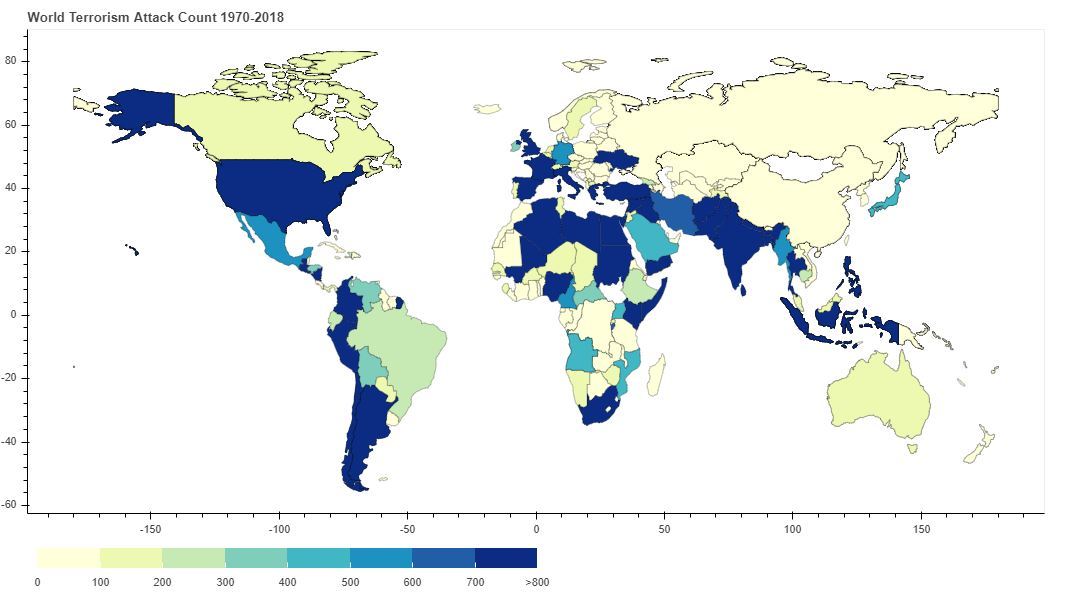